In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
%matplotlib inline

In [41]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()
ttrain=train.drop('Attrition',axis=1)
all_data = pd.concat((ttrain.loc[:,'Age':],
                      test.loc[:,'Age':]))
all_data.drop(['EmployeeNumber','Behaviour'],axis=1,inplace=True)
all_data = pd.get_dummies(all_data)
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.Attrition

In [42]:
# all_data.head()
# trial=all_data



In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [44]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledRandom', Pipeline([('Scaler', StandardScaler()),('RFC', RandomForestClassifier())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.232799 (0.016759)
ScaledRandom: -0.020245 (0.017579)
ScaledKNN: -0.142945 (0.116113)
ScaledCART: -0.067485 (0.052704)
ScaledGBM: -0.090858 (0.039488)


In [45]:
from sklearn.model_selection import GridSearchCV

# scaler = StandardScaler().fit(x_train)
# rescaledX = scaler.transform(x_train)
param_grid = dict(n_estimators=np.array([50,100,200,300,400,500,1000,1500]))
model = RandomForestClassifier()
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(X_train, y)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-0.022086 (0.020199) with: {'n_estimators': 50}
-0.022086 (0.020384) with: {'n_estimators': 100}
-0.020245 (0.018618) with: {'n_estimators': 200}
-0.018405 (0.016913) with: {'n_estimators': 300}
-0.019018 (0.017450) with: {'n_estimators': 400}
-0.020859 (0.018849) with: {'n_estimators': 500}
-0.020245 (0.018002) with: {'n_estimators': 1000}
-0.020859 (0.018241) with: {'n_estimators': 1500}
Best: -0.018405 using {'n_estimators': 300}


In [48]:
# # model = RandomForestClassifier()
# # model.fit(X_train,y)
# RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=None, max_features='auto',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, n_estimators=100,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
# criterion=[“gini”, “entropy”]
# n_estimators=np.array([50,100,200,300,400,500,1000,1500])
# max_depth=np.array([])
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [62]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.1min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [56]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [59]:
rf = RandomForestClassifier(n_estimators = 400,min_samples_split = 2,min_samples_leaf=1,max_features= 'sqrt',max_depth=None,bootstrap=False)
rf.fit(X_train, y)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
from sklearn.metrics import mean_squared_error

# scaler = StandardScaler().fit(x_train)
# rescaled_X_train = scaler.transform(x_train)

# transform the validation dataset
# rescaled_X_test = scaler.transform(x_test)
predictions = rf.predict_proba(X_test)[:,1]

In [63]:
# solution = pd.DataFrame({"id":test.Id, "Attrition":predictions})
# solution.to_csv("hyper.csv", index = False)

In [64]:
import xgboost as xgb
dtrain = xgb.DMatrix(x_train, label = y_train)
dtest = xgb.DMatrix(x_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

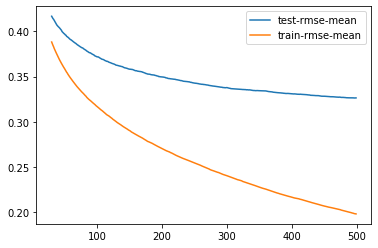

In [65]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [67]:
model_xgb = xgb.XGBClassifier(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv  n_estimators=360, max_depth=2, learning_rate=0.1
model_xgb.fit(X_train, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=360, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:
xgb_preds = np.expm1(model_xgb.predict_proba(X_test)[:,1])
preds = 0.7*predictions + 0.3*xgb_preds


In [71]:
# from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test,preds)


In [73]:
solution = pd.DataFrame({"id":test.Id, "Attrition":predictions})
solution.to_csv("hyperxgb.csv", index = False)